### Separate colors in immunohistochemical staining
[link to example](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_ihc_color_separation.html#sphx-glr-auto-examples-color-exposure-plot-ihc-color-separation-py)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

In this example we separate the immunohistochemical (IHC) staining from the hematoxylin counterstaining. The separation is achieved with the method known as "color deconvolution".

c:\Users\AdamSz\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


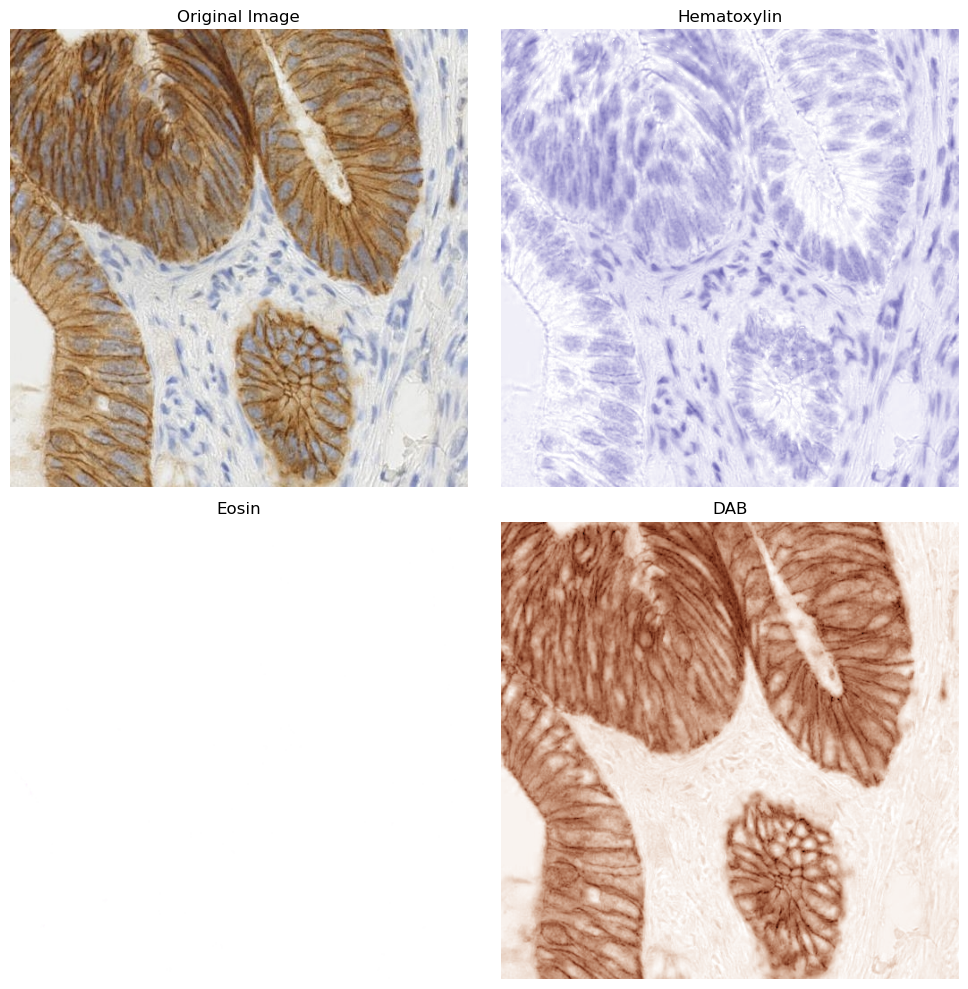

In [2]:
# Example IHC image
ihc_rgb = skimage.data.immunohistochemistry()

# Separate the stains from the IHC image
ihc_hed = skimage.color.rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = skimage.color.hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = skimage.color.hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = skimage.color.hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original Image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin") # Note that there is no Eosin in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

Now we can easily maipulate the hematoxylin and DAB channels:

(512, 512) (512, 512) (512, 512)


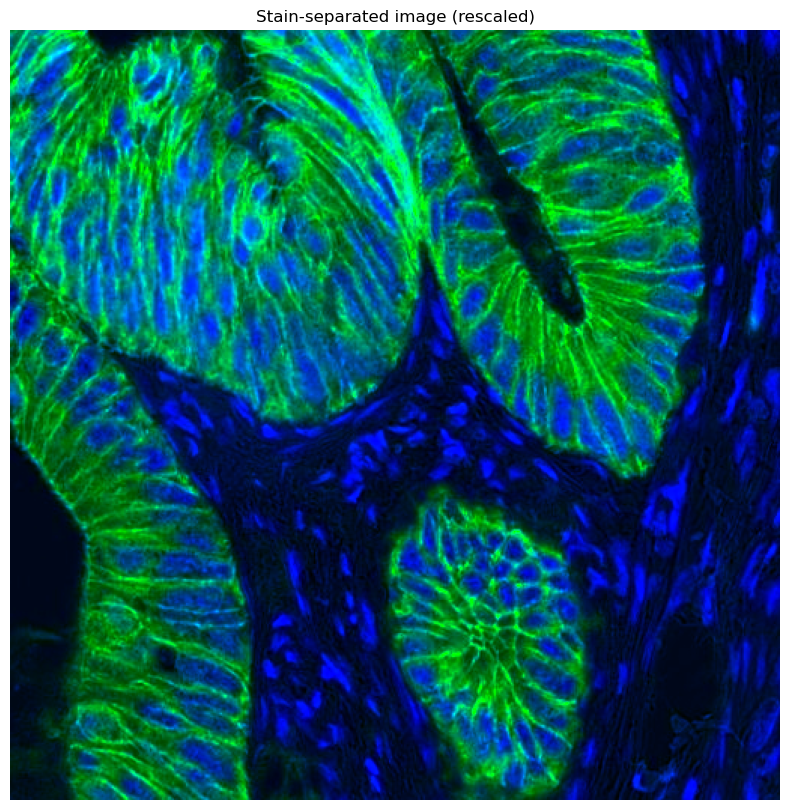

In [3]:
# Rescale hematoxylin and DAB channels and give them fluorescent look
h = skimage.exposure.rescale_intensity(
    ihc_hed[:, :, 0], out_range=(0,1),
    in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)) 
)
d = skimage.exposure.rescale_intensity(
    ihc_hed[:, :, 2], out_range=(0,1),
    in_range=(0, np.percentile(ihc_hed[:, :, 2], 99))
)
# Cast the two channels into an RGB image, as the blue and green channels respectively
print(null.shape, d.shape, h.shape)
zdh = np.dstack((null, d, h))

fig = plt.figure(figsize=(10,10))
axs = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0])
axs.imshow(zdh)
axs.set_title('Stain-separated image (rescaled)')
axs.axis('off')
plt.show()